# Degrees of Freedom for Spectral Peaks
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/spectral_degrees_of_freedom.ipynb)

Here we will demonstrate two ways to increase your degrees of freedom for your spectral estimates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

### Get your data together

In [2]:
# input parameters
T = 256         #length of window
N = 99         #number of realizations
alpha = 0.5     #red noise lag-one autocorrelation

# define your timesteps and frequencies
freq = np.arange(0.,T/2+1.)/T
factor = np.sqrt(1.-alpha*alpha)

In [3]:
rng = np.random.default_rng(55)
# make a fake red noise time series
x = np.zeros(T*N,)
x[0] = factor*np.random.randn()
for j in np.arange(1,x.shape[0]):
    # add a cosine to our data to give it some additional power
    # at a particular frequency of 50/256=0.2 cycles/time step
    x[j] = x[j-1]*alpha + factor*rng.normal() + \
           .15*np.cos(2.*np.pi*(1.-0.0001*rng.normal())*50./256.*j)


## Average chunks of the spectra together

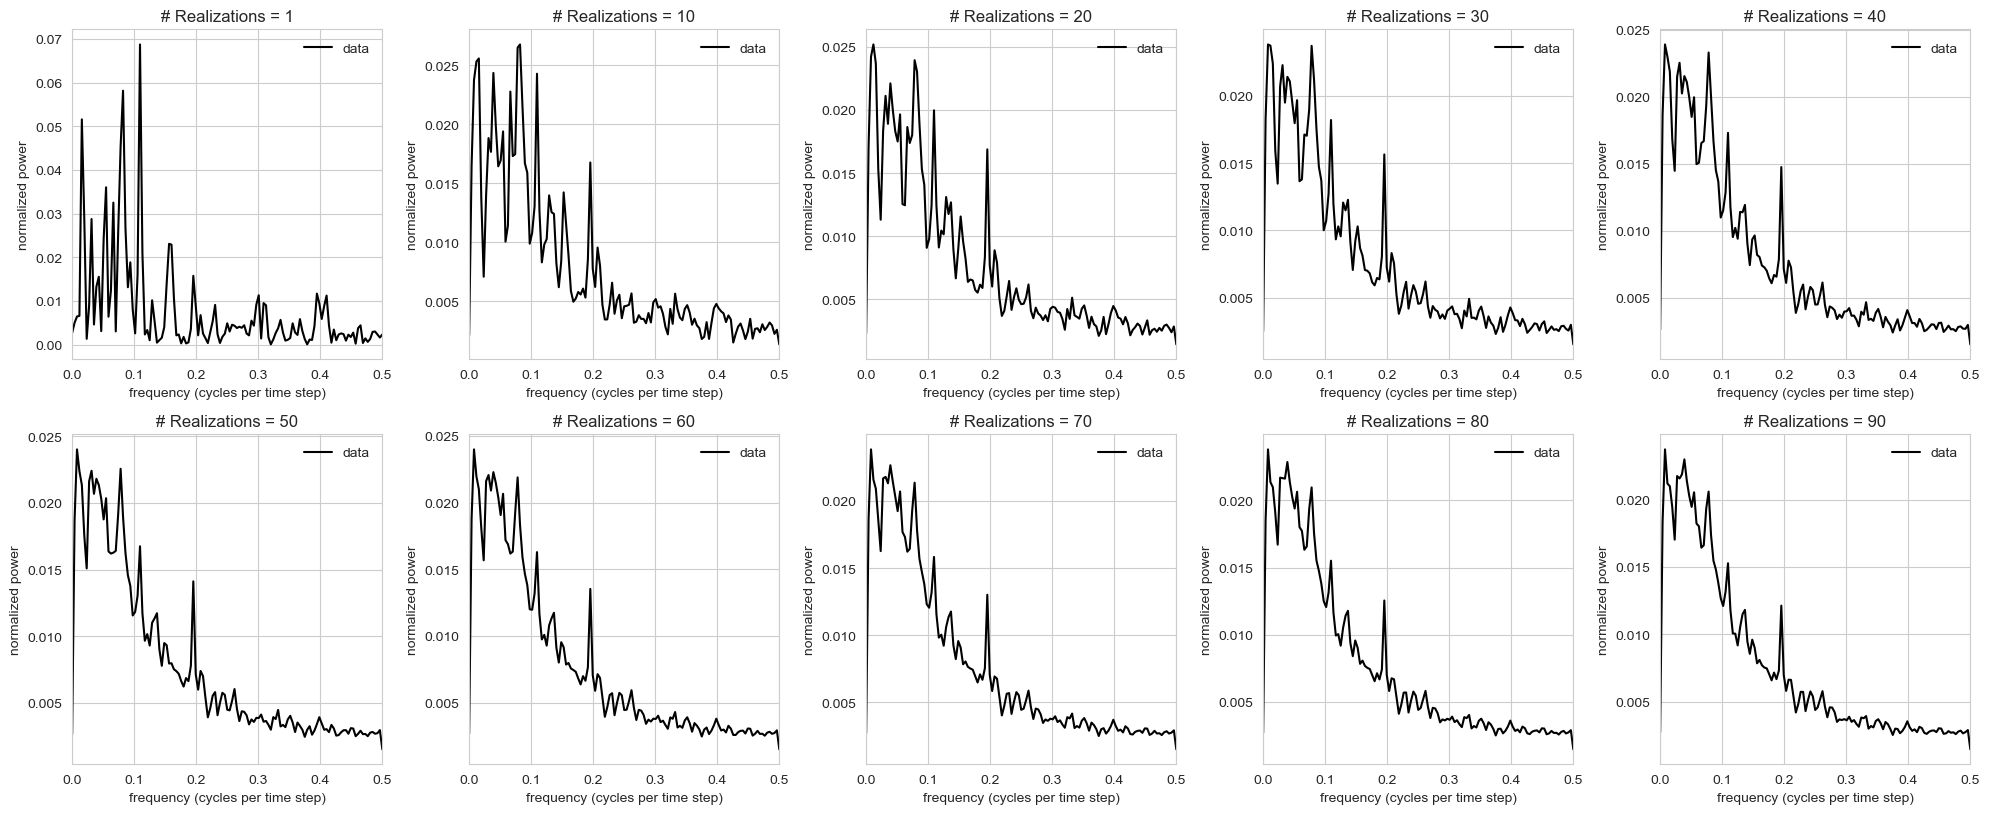

In [4]:
plt.figure(figsize=(20,20))
subplot_count = 0
# loop realizations
for ir in np.arange(0,N,1):
    x_data = x[:(ir+1)*T]
    # print(f"{x_data.shape = }")

    # calculate the power spectrum using a hamming window
    p = sig.welch(x_data, window='hamming', nperseg=T)
    if ir == 0:
        psum = p[1]
    else:
        psum = psum + p[1]

    # calculate average    
    pave = psum/(ir+1.0)
    #normalize the spectrum
    pave = pave/np.sum(pave)
 
    if (ir+1.) % 10 == 0 or ir==0:
        subplot_count = subplot_count + 1
        plt.subplot(5,5,subplot_count)
        plt.xlabel('frequency (cycles per time step)')
        plt.ylabel('normalized power')
        plt.title('# Realizations = ' + str(ir+1))
        #plt.ylim(0,20.)
        plt.xlim(0,0.5)
        plt.plot(freq,pave,'-k', label = 'data')
        plt.legend(frameon = False)

plt.tight_layout()
plt.show()

As expected, the curve gets smoother as we average more realizations together. Each estimate in each realization gives us two degrees of freedom, thus, by the final figure, we have nearly 200 degrees of freedom for each estimate. That is a large N!

## Average adjacent spectral estimates together

(1280,)
(129,)


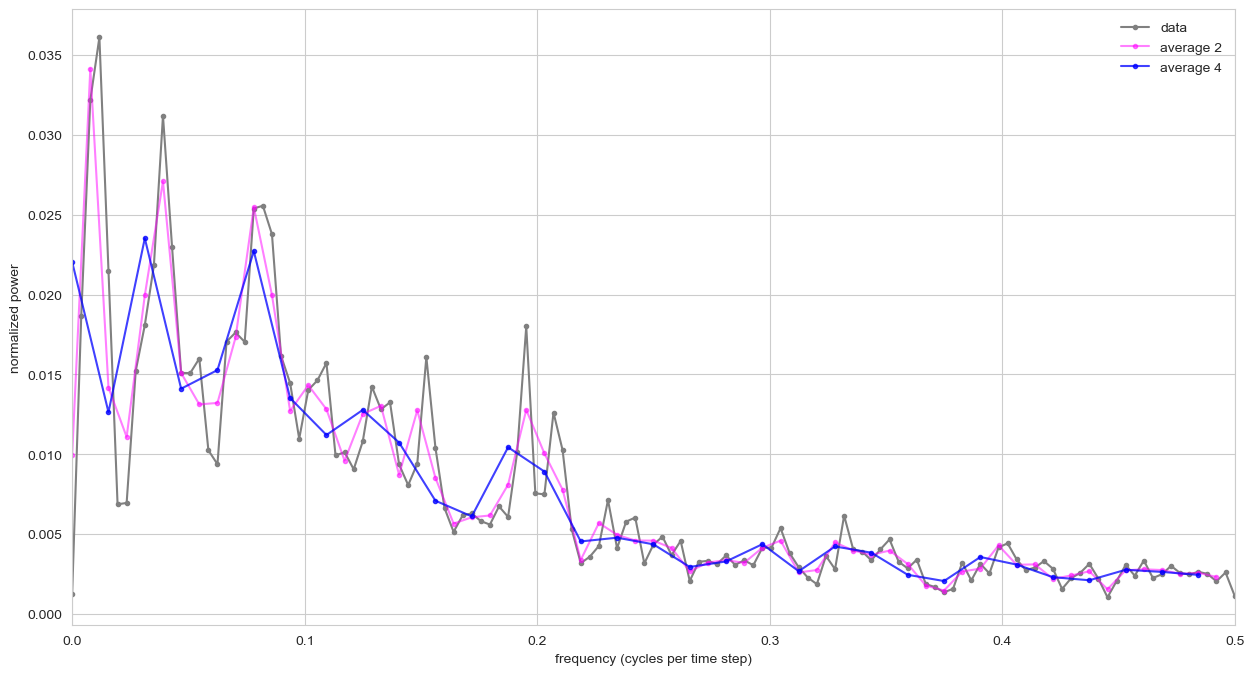

In [5]:
x_data = x[:T*5]
print(x_data.shape)

# calculate the power spectrum using a hamming window
p = sig.welch(x_data, window='hamming', nperseg=T)
pstd = p[1]/np.sum(p[1])
print(np.shape(pstd))

plt.figure(figsize=(15,8))
plt.xlabel('frequency (cycles per time step)')
plt.ylabel('normalized power')
# plt.ylim(0,.06)
plt.xlim(0,0.5)
plt.plot(freq,pstd,'.-',color='gray', label = 'data')

aveTwo = np.mean(pstd[:-1].reshape(-1, 2), axis=1)
plt.plot(freq[0:-1:2],aveTwo,'.-', color='fuchsia', label='average 2', alpha=.5)

aveFour = np.mean(pstd[:-1].reshape(-1, 4), axis=1)
plt.plot(freq[0:-1:4],aveFour,'.-',color='blue', label = 'average 4', alpha=.75)

plt.legend(frameon = False)
plt.show()


As expected, the blue curve (averaging 4 estimates together) is smoother than the pink or gray curves. For the gray curve, we have 2 degrees of freedom per estimate. For the pink curve, we have four degrees of freedom (two from each of the two estimates averaged together). For the blue curve we have 8 degrees of freedom per estimate. Note that in payment for this, we give up frequency resolution.

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/spectral_DOF.ipynb*